In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.sparse import linalg

In [2]:
adj = sp.load_npz('./finer1985adj.npz')

In [3]:
def sqrtinvdiag(M):
    """Inverts and square-roots a positive diagonal matrix.
    Args:
        M (csc matrix): matrix to invert
    Returns:
        scipy sparse matrix of inverted square-root of diagonal
    """

    d = M.diagonal()
    dd = [1 / max(np.sqrt(x), 1 / 999999999) for x in d]

    return sp.dia_matrix((dd, [0]), shape=(len(d), len(d))).tocsc()

In [4]:
A = adj.tocsc()
D_out = sp.diags(A.transpose().sum(
    axis=0).tolist(), [0]).tocsc()
D_in = sp.diags(A.sum(axis=0).tolist(), [0]).tocsc()
Dbar = (D_in + D_out)
d = sqrtinvdiag(Dbar)
normA = d * A * d
size = A.shape[0]
H = (A-A.transpose()) * 1j
H_abs = np.abs(H)
D_abs_inv = sp.diags(1/np.array(H_abs.sum(1))[:, 0])
D_abs_inv.data[np.isinf(D_abs_inv.data)] = 0.0
H_rw = D_abs_inv.dot(H)

In [5]:
H_rw

<282x282 sparse matrix of type '<class 'numpy.complex128'>'
	with 4772 stored elements in Compressed Sparse Row format>

In [6]:
u, s, vt = sp.linalg.svds(H_rw, 100)

In [7]:
eigens = s[list(np.arange(99,-1,-1))]

In [8]:
eigengaps = eigens[:-1] - eigens[1:]

In [9]:
np.argsort(-eigengaps)

array([ 0,  2,  5,  1, 10,  8, 20, 12,  3,  4, 42, 28, 51, 16, 60, 54,  9,
       47, 14, 87, 56, 45, 63, 26, 39, 52,  6, 29, 34, 21, 33, 13, 36, 15,
       69, 74,  7, 71, 85, 24, 38, 66, 78, 98, 32, 96, 35, 76, 37, 80, 77,
       88, 18, 19, 58, 25, 50, 83, 93, 95, 68, 72, 64, 22, 49, 57, 91, 65,
       44, 73, 30, 11, 92, 67, 53, 48, 90, 31, 70, 17, 46, 84, 75, 23, 81,
       27, 62, 41, 61, 40, 79, 59, 43, 97, 89, 82, 86, 55, 94])

In [10]:
eigengaps

array([0.08398644, 0.01760394, 0.05500739, 0.00818825, 0.00815103,
       0.02620469, 0.00533655, 0.00427652, 0.01158319, 0.00616234,
       0.01465173, 0.00218011, 0.00989813, 0.00491536, 0.00579585,
       0.00476611, 0.00727628, 0.00159217, 0.00274528, 0.00270807,
       0.01085157, 0.00499982, 0.00240784, 0.00130171, 0.00416267,
       0.00266463, 0.00554545, 0.00125911, 0.00755765, 0.0052586 ,
       0.00219808, 0.00176034, 0.00370992, 0.00493599, 0.00516951,
       0.00353146, 0.00481659, 0.00347368, 0.00415132, 0.00549403,
       0.00090055, 0.00099014, 0.00808728, 0.00069334, 0.00223973,
       0.00563485, 0.00157965, 0.00600642, 0.00184892, 0.00240764,
       0.00261478, 0.00742843, 0.00537786, 0.00200856, 0.00668424,
       0.00024631, 0.00565217, 0.00239138, 0.00267837, 0.00086247,
       0.00682135, 0.00098278, 0.00105491, 0.00562203, 0.00244666,
       0.00225306, 0.0040648 , 0.00203581, 0.00250948, 0.00469448,
       0.0016501 , 0.00427554, 0.0024736 , 0.00220174, 0.00439

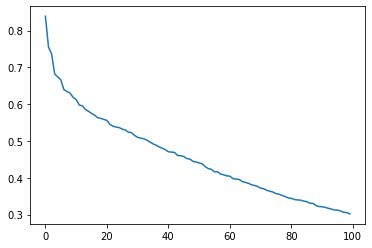

In [11]:
plt.plot(eigens)

1985
[ 0  2  5  1 10  8 20 12  3  4 42 28 51 16 60 54  9 47 14 87 56 45 63 26
 39 52  6 29 34 21 33 13 36 15 69 74  7 71 85 24 38 66 78 98 32 96 35 76
 37 80 77 88 18 19 58 25 50 83 93 95 68 72 64 22 49 57 91 65 44 73 30 11
 92 67 53 48 90 31 70 17 46 84 75 23 81 27 62 41 61 40 79 59 43 97 89 82
 86 55 94]
[0.08398644 0.01760394 0.05500739 0.00818825 0.00815103 0.02620469
 0.00533655 0.00427652 0.01158319 0.00616234 0.01465173 0.00218011
 0.00989813 0.00491536 0.00579585 0.00476611 0.00727628 0.00159217
 0.00274528 0.00270807 0.01085157 0.00499982 0.00240784 0.00130171
 0.00416267 0.00266463 0.00554545 0.00125911 0.00755765 0.0052586
 0.00219808 0.00176034 0.00370992 0.00493599 0.00516951 0.00353146
 0.00481659 0.00347368 0.00415132 0.00549403 0.00090055 0.00099014
 0.00808728 0.00069334 0.00223973 0.00563485 0.00157965 0.00600642
 0.00184892 0.00240764 0.00261478 0.00742843 0.00537786 0.00200856
 0.00668424 0.00024631 0.00565217 0.00239138 0.00267837 0.00086247
 0.00682135 0.00098278 

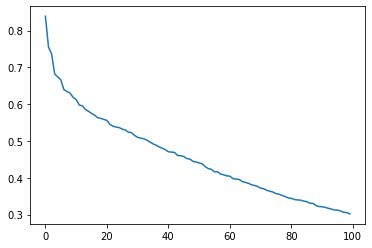

1986
[ 0  1  2  3  5 20  9 16  4 12 10 35  8 43  7 84 39 30 33 18 15 50 49 17
 68 29 65 53 42 31  6 37 59 23 26 83 93 61 47 55 27 70 77 90 73 64 25 28
 21 85 74 89 40 63 57 51 96 52 71 13 76 48 22 94 86 46 81 36 80 95 69 79
 19 54 97 44 91 45 56 78 24 41 38 11 72 14 62 67 60 98 66 88 82 58 34 87
 92 75 32]
[0.07565541 0.03212782 0.02679681 0.01990107 0.01017257 0.01475184
 0.00468884 0.00741186 0.00867879 0.01026929 0.00940109 0.00132697
 0.00974426 0.00247197 0.00126406 0.00622218 0.01021334 0.0057681
 0.00640729 0.00174177 0.01099222 0.00309658 0.00229074 0.00428033
 0.0014415  0.0033553  0.00420485 0.00392494 0.00312012 0.00537802
 0.0068244  0.00493355 0.00035543 0.00649139 0.00068526 0.00891593
 0.00193629 0.00447732 0.00137135 0.00687384 0.00276319 0.00138963
 0.00510631 0.0083919  0.00158469 0.00156514 0.00205606 0.00399794
 0.00232632 0.00600393 0.00610506 0.00272012 0.00253962 0.00512942
 0.00171443 0.00393757 0.0015497  0.00273581 0.00079535 0.00431392
 0.00111804 0.00400168 

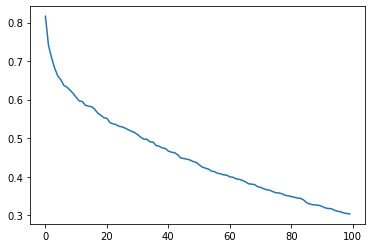

1987
[ 0  1  3  2  5  9 13 67  6  4 18 22 34 72 30 12 19 88 15 53 42 31 29 56
 61 45 24 10 47 50 36 16 55 76  7  8 40 38 20 28 78 59 85 37 14 80 98 68
 65 25 27 33 57 41 96 49 43 86 82 46 84 94 79 71 62 23 87 69 93 70 63 26
 89 21 52 44 77 11 95 92 75 74 17 51 54 81 90 73 58 35 91 32 83 97 60 39
 48 66 64]
[0.06070436 0.04720101 0.01673865 0.0181572  0.0094235  0.01575357
 0.00969969 0.00390896 0.00389456 0.01298016 0.00473536 0.0019399
 0.00715299 0.01146224 0.00334789 0.00586594 0.00427036 0.00173651
 0.00884566 0.00688828 0.00367154 0.00207198 0.00832606 0.00236942
 0.00487214 0.00301235 0.00211184 0.00296873 0.00365605 0.00519632
 0.00786323 0.00521699 0.00095386 0.00292552 0.0081506  0.0010267
 0.00460258 0.0033771  0.0036909  0.00073661 0.00377991 0.00282518
 0.00536783 0.00270388 0.0019876  0.00488959 0.00256727 0.00471704
 0.00048774 0.0027728  0.00468132 0.00150339 0.00200368 0.00564566
 0.00141159 0.00421232 0.00514082 0.00292532 0.00107656 0.00348807
 0.00081613 0.00506053 0

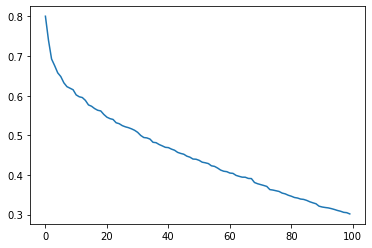

1988
[ 0  3  7  1  4 10  2 19  6  5 75 30 14  9 15 67 48 60 50 20 36 16 39 27
 38 85 41 95 28 29 77 24 23 53 43 54 18 33 73 13 21 90 12 56 66 59 74 88
 65 72 81 44 42 31 47 80 35 91 45 79 25 57 96 83 71 94  8 70 22 34 64 40
 98 37 78 87 69 51 11 92 49 17 93 86 46 63 61 55 32 26 52 76 58 62 97 89
 68 82 84]
[0.05431811 0.03035417 0.01330512 0.03084462 0.01513889 0.00999906
 0.01222026 0.0306317  0.00217589 0.00829591 0.01406251 0.0015332
 0.00377887 0.00388547 0.00836412 0.00765043 0.00547992 0.00140343
 0.00399895 0.01263872 0.00608261 0.00387865 0.00193285 0.0043389
 0.00441315 0.00229749 0.0011534  0.00520508 0.00467581 0.00463028
 0.00841697 0.00270152 0.0012124  0.00398271 0.00190394 0.00240338
 0.00550004 0.00180199 0.00509952 0.00543698 0.00186237 0.00470964
 0.00276315 0.00420162 0.00278018 0.00237536 0.00127155 0.00264678
 0.00705237 0.00142199 0.00640448 0.00160133 0.00114802 0.0043157
 0.00417648 0.00122505 0.0037041  0.00225388 0.00106794 0.00336454
 0.00678641 0.00123558 0.

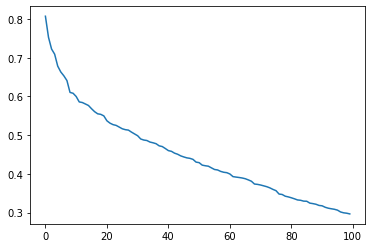

1989
[ 0  1  2  3  8  5 11 43 13 21 20 24 16 29 15 35 86  9 40 45 28 31 69 55
 17 49 71  4 57 47 80  6  7 64 67 66 27 38 61 97 10 72 32 51 53 14 34 62
 75 74 37 78 59 48 33 95 54 92 70 36 63 39 98 88 89 60 82 22 58 91 50 30
 25 52 77 42 26 76 18 85 23 73 65 41 90 94 81 87 56 79 44 83 93 19 96 12
 68 46 84]
[0.06624546 0.02075396 0.02017791 0.01893056 0.00451988 0.01631532
 0.00419272 0.00415356 0.01748129 0.00595091 0.00370195 0.01135909
 0.00057284 0.00927067 0.00308807 0.00697714 0.00781579 0.00488806
 0.00164076 0.00060248 0.00915925 0.0091631  0.00219284 0.00148617
 0.00840989 0.00198189 0.00174945 0.00398986 0.0057105  0.00719698
 0.00199289 0.00554708 0.00340318 0.0025993  0.00301569 0.00692458
 0.00234913 0.00288907 0.00390262 0.00229535 0.00594235 0.00140267
 0.00176644 0.01017046 0.00086511 0.00582701 0.00041852 0.00425705
 0.00265694 0.00463314 0.00199299 0.00338869 0.00192806 0.00315725
 0.00256859 0.0049449  0.00096011 0.00425938 0.00212345 0.00270826
 0.0022238  0.00389735

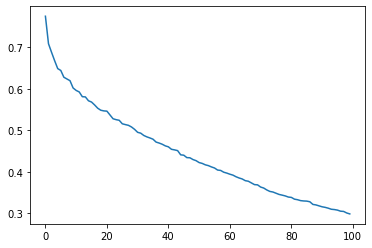

1990
[ 0  1  6  3  2  9 11  5 14 22 26 13  8 16 53 38 19 18 30 31  7 20 35 60
 57 77 70 17 42 12 49 66 47 27 21 52 83 67  4 34 96 78 71 43 89 55 25 44
 97 80 36 92 63 51 85 65 88 33 64 73 41 75 50 94 91 24 86 74 93 46 58 69
 23 48 39 62 40 54 81 45 82 87 32 59 84 79 56 61 29 37 90 72 98 15 28 10
 68 76 95]
[5.82072800e-02 2.70878977e-02 1.56561827e-02 1.59593237e-02
 3.63073909e-03 1.15196266e-02 1.61309550e-02 4.92524047e-03
 7.44499022e-03 1.33384354e-02 7.27954181e-04 1.16778346e-02
 3.94538011e-03 8.60865706e-03 1.11791559e-02 8.42441726e-04
 7.28727328e-03 4.05415715e-03 6.36463404e-03 6.39690472e-03
 4.81135739e-03 3.74439210e-03 9.69544575e-03 1.96042682e-03
 2.38998496e-03 2.82257613e-03 8.95142125e-03 3.80911480e-03
 7.63838820e-04 1.05386010e-03 5.40147071e-03 5.34526151e-03
 1.45778670e-03 2.59793392e-03 3.46105038e-03 4.65396605e-03
 2.72485617e-03 1.03775516e-03 6.46312731e-03 1.86782060e-03
 1.74619863e-03 2.53044482e-03 3.97967270e-03 3.23507216e-03
 2.80314892e-03 1.509

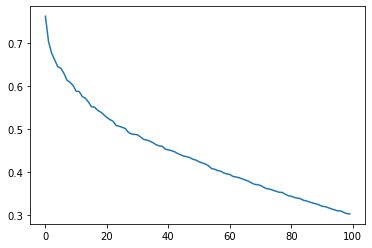

1991
[ 0  1  3  4 14  2 21  9 12  7  8 34 31  5 24 41 11 60 47 43 67 42 25 15
 83 28 57 22 18 73 48 64 36 85 40 94 27 19 58 53 38 88 69 46 16 52 26 56
 20 13 98 32 39  6 77 10 72 70 49 54 71 45 17 81 51 74 62 65 84 68 80 78
 92 30 33 59 50 55 63 95 75 61 91 76 96 97 86 90 23 82 79 93 35 44 29 87
 89 66 37]
[0.11627355 0.07390218 0.01440205 0.01912903 0.01861977 0.0072656
 0.00275135 0.01048282 0.00905274 0.01316048 0.00263684 0.00621358
 0.01065838 0.00296734 0.01561957 0.00437729 0.00337036 0.00235091
 0.00414696 0.00366718 0.00304736 0.01429231 0.0042263  0.00116642
 0.00684125 0.00443968 0.00324662 0.00381668 0.00432827 0.00063484
 0.00186044 0.00805462 0.00286451 0.0018389  0.00809055 0.00088724
 0.0039832  0.0004867  0.00348508 0.00284601 0.00389315 0.00632266
 0.00444099 0.00487135 0.0008315  0.00235779 0.00338324 0.00502556
 0.00403106 0.00245988 0.00175914 0.00230834 0.00336763 0.00352413
 0.0024549  0.00175739 0.00320044 0.00422649 0.00361852 0.0018002
 0.00548562 0.00170247 0

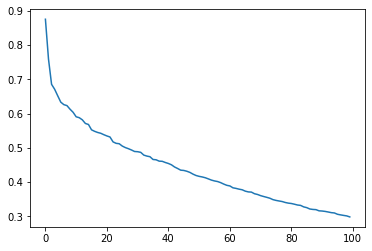

1992
[ 0  1  3  4  5 10  2  8 16  7 38 14 53 31 80 21 51 24 47 46 25 35 27 15
 12 45 32 18 11 19 71 23 62 33 20 30  9 86 98 13  6 91 54 64 49 72 78 61
 92 67 77 84 17 58 93 42 96 41 44 22 40 65 87 85 73 89 29 66 26 94 48 63
 74 34 75 69 59 56 68 88 36 70 97 37 82 79 60 57 95 55 43 83 50 39 81 28
 52 76 90]
[0.07765882 0.06473491 0.01374555 0.03590559 0.01918576 0.01640313
 0.00319315 0.00738029 0.01134686 0.00357672 0.01549537 0.00450815
 0.00478343 0.00330334 0.00662867 0.00485366 0.01051319 0.00271556
 0.00453787 0.00442783 0.00402405 0.00588575 0.00263332 0.00442157
 0.00552324 0.00521429 0.00212695 0.00493596 0.00075016 0.00229328
 0.00363991 0.00601466 0.00460622 0.00409669 0.0019238  0.00511393
 0.00170569 0.00159079 0.00707815 0.00091076 0.00262168 0.00266108
 0.0026812  0.001185   0.00263541 0.00473129 0.00527854 0.0053531
 0.00203854 0.00307379 0.00097353 0.00586366 0.00055822 0.00630087
 0.0031053  0.00121588 0.00176179 0.00143132 0.00271511 0.00177299
 0.0015096  0.00290481 

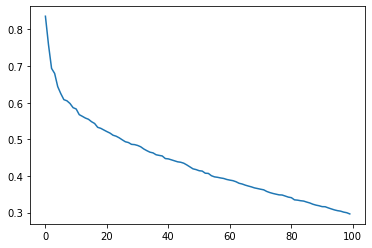

1993
[ 0  1  3  2 13 18  9  6 20 12 22  5 16  7 85 37 10 15 52 48 55  4 39 27
 59 42 65 45 66 34 30 38 68 46 91 24 97 11 32  8 93 28 60 72 50 89 33 63
 36 74 54 41 58 29 79 71 62 17 14 82 76 80 56 78 51 69 19 31 77 25 83 81
 40 84 88 90 86 35 23 43 26 61 57 44 95 53 92 96 75 94 70 64 67 49 73 21
 87 47 98]
[0.05133712 0.03497995 0.01775961 0.01844879 0.00571291 0.00700544
 0.00940279 0.00674953 0.00371992 0.01063603 0.00584411 0.00398821
 0.00834557 0.01548742 0.00258502 0.00583848 0.00694355 0.00262944
 0.0108395  0.0022475  0.00914013 0.00072658 0.00716313 0.00148664
 0.00431984 0.00212397 0.00145005 0.00528805 0.00336506 0.00280703
 0.0046936  0.00222774 0.00398234 0.00319031 0.00482552 0.00156272
 0.00304893 0.00613303 0.00464748 0.00569089 0.00199409 0.00288197
 0.00505306 0.0014851  0.00131812 0.00492674 0.00437546 0.0003576
 0.00573176 0.00073769 0.00327924 0.00231668 0.0057642  0.00126186
 0.00292671 0.00572291 0.00234232 0.00134368 0.00287838 0.00523366
 0.00333786 0.00137743 

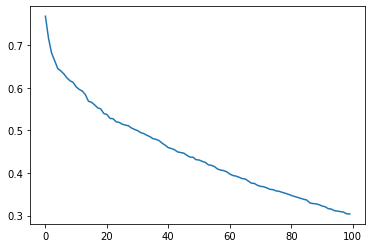

1994
[ 0  2  4  7 10 13  8 32 25  5  3 36  9 21 29  1 62 40 16  6 53 18 55 15
 12 34 57 19 76 22 28 42 46 52 44 43 49 84 67 80 37 95 14 58 81 23 89 66
 20 60 47 82 69 92 64 63 26 56 97 75 31 17 50 83 88 71 41 68 87 72 27 73
 96 74 30 79 33 70 24 35 59 11 78 39 91 77 90 61 45 38 86 54 51 85 98 94
 65 93 48]
[0.08461289 0.00584727 0.04164774 0.00677876 0.0182713  0.00689771
 0.00541856 0.0150396  0.00874858 0.00659101 0.01211299 0.00156731
 0.00529905 0.00915823 0.00310532 0.00537692 0.00560725 0.00243079
 0.00539337 0.00499882 0.00291349 0.00653269 0.00449041 0.00303389
 0.0016208  0.00743589 0.00258818 0.00207594 0.00438359 0.00599263
 0.00190953 0.00246884 0.00872539 0.00183489 0.00527415 0.00158629
 0.00662406 0.00319051 0.00122319 0.00149396 0.00572878 0.00221347
 0.00390977 0.00351953 0.00362844 0.00123486 0.00383412 0.00271399
 0.0003552  0.00349447 0.00242179 0.00101905 0.00370632 0.00539458
 0.00103065 0.00538931 0.00257217 0.00521001 0.00308309 0.0015678
 0.00289005 0.00123624 

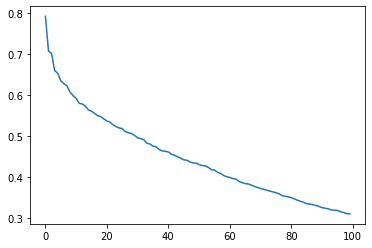

1995
[ 0  3  1  9 13  6  4  8  2 31 16 47 68 12 18 81 24 60 29 53  5 22 39 34
 11 25 20 75 78 56 71 49 57 40 42  7 84 21 10 33 41 38 51 97 37 28 23 44
 35 26 15 86 63 65 14 98 43 89 19 94 92 61 91 36 95 66 69 70 59 27 62 88
 82 74 30 55 73 64 76 87 67 54 79 90 50 80 17 45 77 32 58 93 46 72 83 52
 48 85 96]
[0.06421047 0.03320399 0.00925388 0.0344771  0.0094795  0.00544485
 0.01135616 0.00432777 0.00934443 0.01427763 0.00410083 0.00532383
 0.00629856 0.01331038 0.00303216 0.00327312 0.00743832 0.00105122
 0.00619681 0.00282396 0.00518604 0.00411272 0.00543605 0.00356767
 0.00593971 0.00523985 0.00342222 0.00196078 0.00358558 0.00572274
 0.00167849 0.00797869 0.00094306 0.00386161 0.00535726 0.00342439
 0.00246648 0.00364266 0.00381236 0.00539271 0.00440873 0.00385358
 0.00438354 0.0029569  0.00346488 0.00105026 0.00076254 0.00700611
 0.00043424 0.00460645 0.0011455  0.00372509 0.00043661 0.00569102
 0.00124416 0.0016095  0.00493547 0.00457219 0.00087274 0.00200553
 0.0058247  0.00269049

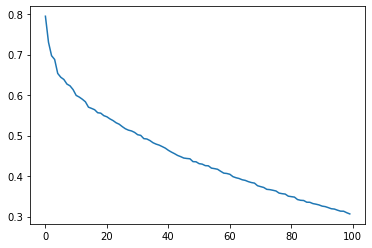

1996
[ 0  1  5  3  6 18  9 16  4 14 28 12 45 27 34 22 41 11 20  8 21 83 30 67
 55 19 89 39 53 23 46 52 61 56 32 95 62 75 13 93 50 36 15 57  7 79 65 74
 77 81 87 37 69 71 33 49 58 64 42 10 17 84 43 35 47 97  2 26 94 82 73 90
 40 48 25 51 72 44 60 98 85 76 38 96 92 78 63 68 91 31 24 59 54 29 66 70
 80 88 86]
[0.06458163 0.02263381 0.00202962 0.01346633 0.00880894 0.0211855
 0.009753   0.0032748  0.00542133 0.00896083 0.00236569 0.00585862
 0.00754609 0.00351965 0.00837103 0.00339994 0.00895022 0.00232756
 0.00942256 0.00466783 0.00579805 0.00531051 0.00648462 0.00390459
 0.00092059 0.00170714 0.00202212 0.00707583 0.00763268 0.00086386
 0.00505525 0.00105257 0.00367685 0.00271733 0.0066449  0.00215565
 0.0034029  0.00299344 0.00146143 0.00409984 0.00181332 0.0058665
 0.00244252 0.00230688 0.00162612 0.00716962 0.00374976 0.00209608
 0.00173294 0.00271227 0.00343632 0.00167037 0.00369804 0.00408331
 0.00087259 0.00486358 0.00368433 0.00335937 0.00270357 0.00090058
 0.00158246 0.00368711 0

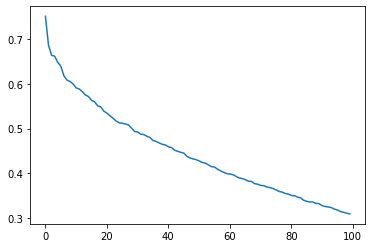

1997
[ 0  1  6  4 19  8 14 35 12 36  2 39  5 10 46  7 58 69 22 33 29 26 30 23
 11 16 42 27 47 54 18  3 95 61 28 82 56 49 20 15 79 67 80 74 78 60 38 71
 34 52 25 21 85 17 48 55 72 63 43  9 97 64 91 13 87 66 75 59 44 77 76 89
 98 53 24 96 68 92 51 62 86 84 70 94 88 32 73 37 31 65 81 45 41 93 90 57
 50 40 83]
[0.05457179 0.0313082  0.00723949 0.00430921 0.01374345 0.00650848
 0.02212707 0.00576016 0.0101814  0.00228975 0.00629857 0.00496074
 0.00764851 0.00201127 0.00873108 0.00370966 0.00469731 0.00258238
 0.00435725 0.01047403 0.0037473  0.00265964 0.00548562 0.00503201
 0.00161942 0.00272346 0.00526178 0.0045143  0.00405797 0.00529936
 0.00503593 0.00093655 0.0009868  0.0053184  0.0027673  0.0077283
 0.00745103 0.00094556 0.00303933 0.00677882 0.00027637 0.00069304
 0.00453828 0.00230524 0.00174481 0.00069873 0.006037   0.00448724
 0.00254308 0.00381387 0.00030823 0.00152122 0.00273742 0.00164622
 0.00446461 0.00251113 0.00381586 0.00055037 0.00569808 0.00175523
 0.00339687 0.0040929  

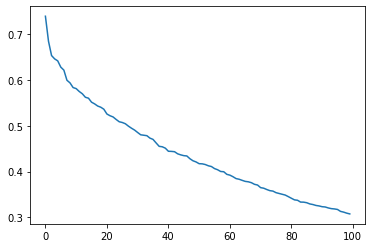

1998
[ 0  1  6  2  3  5 13 11  8  4 16 25  9 20 51 10 32 45 18 67 15 59 89 33
 24 54 23 79 37 27 83 50 35 28 26 86 46 75 14 62 42 21 53 41 31 29  7 77
 68 19 49 44 93 72 47 22 76 82 36 95 69 63 61 73 91 30 40 84 66 56 60 97
 70 94 57 17 87 52 65 39 71 92 48 58 38 64 98 43 34 78 12 96 55 88 85 81
 80 74 90]
[7.00597822e-02 2.00967100e-02 1.42850000e-02 1.36646021e-02
 8.78387405e-03 1.10651823e-02 1.70143304e-02 3.22741490e-03
 9.22122606e-03 8.34802367e-03 6.58073721e-03 9.27336094e-03
 8.28590903e-04 9.37086328e-03 3.52543092e-03 5.36946823e-03
 8.75194114e-03 1.80864898e-03 6.05438170e-03 3.18781561e-03
 8.14602924e-03 3.41732693e-03 2.92407318e-03 4.84221714e-03
 5.06342755e-03 8.69133004e-03 3.90294678e-03 4.44277663e-03
 4.05303104e-03 3.30291259e-03 2.53226769e-03 3.33094155e-03
 6.51492592e-03 5.06628058e-03 8.82911523e-04 4.13481906e-03
 2.80624526e-03 4.52649192e-03 1.26852058e-03 1.47616542e-03
 2.53225680e-03 3.34218252e-03 3.49545699e-03 1.04766723e-03
 3.08981511e-03 6.196

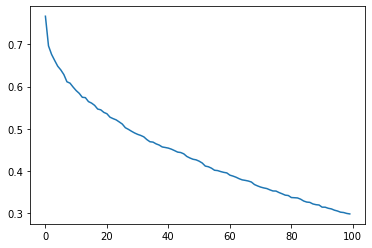

1999
[ 0  1  2  8  3  4  6 15  5 57 13 23 26 12 11 10  7 85 28 45 38 16 19 51
 36 34 29 60 69 24 42 25 31 47 71 20 30 55 21 66 49 79 14 97 32 77 81 64
 74 59 27 82 41 35 73 52 91 96 22 86 58 72 76 50 93 90  9 54 44 33 48 87
 95 67 40 84 62 39 92 53 37 68 88 18 94 43 56 78 98 63 89 61 46 17 83 70
 65 75 80]
[0.05938773 0.03498326 0.01922092 0.01361601 0.01278595 0.00799652
 0.01160378 0.00599839 0.01813508 0.0019581  0.00608082 0.00614427
 0.00614728 0.00731317 0.00340892 0.00823676 0.0051539  0.00071423
 0.00135097 0.00515096 0.00390762 0.00372414 0.00263622 0.00715256
 0.00466481 0.00422942 0.00615814 0.00295439 0.00566846 0.00493049
 0.00384562 0.00412904 0.00332131 0.00178256 0.00493848 0.00287889
 0.00507535 0.0013969  0.00542524 0.0014171  0.00144983 0.00289601
 0.00450024 0.00113827 0.00188353 0.00550485 0.00075615 0.00407039
 0.00169414 0.00357421 0.00210359 0.00514315 0.00274852 0.00140307
 0.00191374 0.00379856 0.00109364 0.00733289 0.0025007  0.00297891
 0.00491855 0.00081476

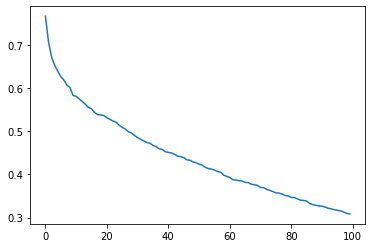

2000
[ 0  2  9 12  5  3 28  4  7 16 19 20 46 43 21 23 61 70 32 34 52 40 11  8
 59 35  6 38 15 72 27  1 49 92 80 53 33 86 57 77 24 26 45 42 31 55 74 83
 75 30 68 65 89 98 25 50 63 22 36 60 14 51 48 13 88 66 82 37 56 94 17 54
 87 64 95 78 47 39 18 10 41 81 85 96 79 69 97 76 67 93 58 91 71 84 90 73
 29 44 62]
[0.07419432 0.00384696 0.01788107 0.01078245 0.00894046 0.011405
 0.00418051 0.00853428 0.00444786 0.0119918  0.00141661 0.00457824
 0.01166784 0.00220079 0.00228049 0.00409575 0.00789672 0.0019409
 0.0015951  0.00782098 0.00617664 0.00556212 0.00235609 0.0055229
 0.00343476 0.00250633 0.00340791 0.00392371 0.01014743 0.00047011
 0.00300913 0.00313518 0.00541517 0.00360522 0.00537495 0.00424476
 0.00234509 0.00200692 0.00417312 0.00160767 0.00482171 0.00140939
 0.00327679 0.00567974 0.00040259 0.00333904 0.00610572 0.00161683
 0.00220819 0.00381755 0.00247117 0.00224728 0.00493592 0.00362919
 0.00191747 0.00308139 0.00200481 0.00354828 0.00100263 0.00427085
 0.00228261 0.00544872 0.0

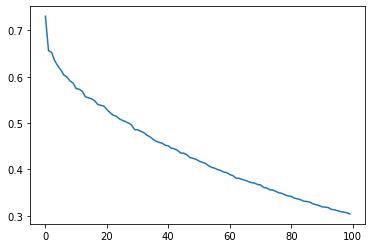

2001
[ 0  3  6  9  4  7  2 20 12  8 18 32 57 31 48 37  5 66 74 16 14 40 68 15
 13  1 26 71 28 36 60 88 93 75 29 22 52 43 39 33 41 23 79 47 63 53 42 49
 25 89 81 51 86 70 92 85 96 55 80 91 95 59 76 77 65 62 27 56 17 34 84 46
 44 19 61 87 38 30 21 90 82 11 54 24 50 83 35 78 10 69 58 73 72 67 45 97
 98 64 94]
[0.06869335 0.00452819 0.00960045 0.02696095 0.01010776 0.00529646
 0.01465626 0.01002934 0.00598381 0.01187646 0.0011656  0.00144908
 0.00615701 0.00454131 0.00486816 0.00454893 0.00493317 0.00187596
 0.00572994 0.00175667 0.00646488 0.00152174 0.00346196 0.0032167
 0.00140671 0.00284274 0.00432256 0.0019416  0.00405718 0.00363916
 0.00166643 0.00546312 0.00566388 0.00329442 0.00186474 0.00126264
 0.00388747 0.00535247 0.00168117 0.00334707 0.00486259 0.00323512
 0.00287948 0.003362   0.0017877  0.00073539 0.00179738 0.00303196
 0.00541407 0.0028507  0.00140095 0.00270851 0.00337998 0.00290511
 0.0014206  0.00251314 0.00191194 0.00560181 0.00093563 0.00214688
 0.00380992 0.00170195 

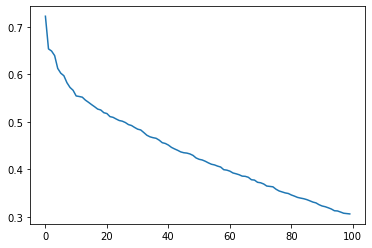

2002
[ 0  9  5  1 11 10  3 26  4 12  6 32  8 20 59 48 13 18 30 96 78 33 50 16
 25 54 22 28 43 21 45 65 15 39 41 57 62 92 82 86 17 94 72 36 83 71 40 19
 35 14 60 69 56  2 37 61 55 88  7 80 38 63 75 87 46 76 24 73 42 68 90 53
 52 67 27 23 44 70 81 97 34 91 89 95 29 74 98 47 49 84 58 85 66 51 64 77
 93 79 31]
[0.07521139 0.011519   0.00258871 0.01017566 0.00970842 0.0137107
 0.00946286 0.00243666 0.0081001  0.01706056 0.01056818 0.01085186
 0.00961106 0.00549656 0.00262424 0.00399632 0.0046167  0.00320648
 0.0053023  0.00271751 0.00675069 0.0041333  0.00441108 0.00169113
 0.00208175 0.00454934 0.00987701 0.00170533 0.00427519 0.00125465
 0.00521391 0.00012105 0.0088535  0.00490651 0.00149068 0.0026418
 0.00281689 0.00256903 0.00234314 0.00389661 0.00272442 0.00388515
 0.00203434 0.00415548 0.00168982 0.00404552 0.00211817 0.00115483
 0.00566669 0.00107927 0.00469961 0.00061971 0.00186492 0.00189636
 0.00442661 0.00250301 0.0026046  0.00370559 0.00079151 0.00567476
 0.00261594 0.00253495 0

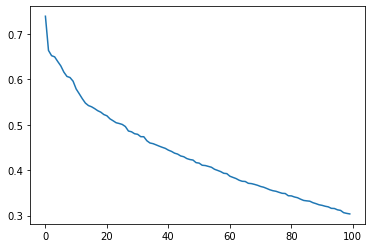

2003
[ 0  1  8  9  5 12  2 46 15 35  6 52 17  7 19 25 89 66 30 18 72 22 53 60
 27 95 28 16  4 21 43 33  3 58 79 73 81 98 14 24 47 57 20 13 56 41 29 61
 23 74 63 10 39 49 31 38 96 50 87 62 55 59 68 11 86 48 84 44 76 54 75 36
 32 34 80 70 69 67 91 93 37 82 42 92 90 83 64 78 65 40 45 85 51 77 94 88
 26 97 71]
[0.06822246 0.02583801 0.00975237 0.00369919 0.00396081 0.01415189
 0.00776565 0.00526197 0.01493033 0.01421652 0.0026762  0.00229528
 0.01004043 0.00328665 0.00355636 0.00848857 0.00404638 0.00534207
 0.00437049 0.00513636 0.00331332 0.00381851 0.00428667 0.00286458
 0.00351156 0.00477975 0.00058743 0.00417601 0.00407327 0.00294515
 0.00452799 0.00262076 0.00186367 0.00374288 0.00186339 0.00818941
 0.00193147 0.00161674 0.00259772 0.0026552  0.00094005 0.00299686
 0.00143311 0.00377843 0.00210614 0.00079845 0.00901516 0.00339656
 0.00223536 0.00264194 0.00251987 0.00076979 0.0057375  0.0042771
 0.00203406 0.00238627 0.00300569 0.0033392  0.00364266 0.00234971
 0.00420853 0.00290309 

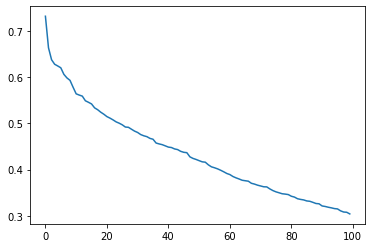

2004
[ 0  1  4  7  6  8  9 25 12  2 60 24 14 20 23 38 15 30 69 17 19 58 40 10
 21 11 43 34 35  5 45 57 50 36 18 66 31 90 41 51 71 56 73 79 77 82 48 53
 65 59 27 46 33 64 84 80 86 91 63 75 37 28 72 49 62 95 88 68 92 29 89  3
 13 96 39 52 78 67 32 54 70 76 74 47 97 44 61 83 81 42 94 98 22 93 16 55
 85 87 26]
[0.06170136 0.02162    0.00708888 0.0018219  0.02010952 0.00447875
 0.01336205 0.01354207 0.0112555  0.00956373 0.005051   0.00473856
 0.00898976 0.00172537 0.00606675 0.00563419 0.00091813 0.00513695
 0.00396301 0.00510418 0.00590253 0.004862   0.00107126 0.00584048
 0.00619122 0.00918624 0.0001069  0.00280795 0.00232247 0.00188169
 0.00536898 0.00385475 0.0014852  0.002725   0.00457856 0.00452986
 0.00399294 0.00235082 0.00579659 0.0016761  0.00506409 0.00348941
 0.00123301 0.0046655  0.00131433 0.00429604 0.00273586 0.0013494
 0.00306688 0.00224542 0.00407152 0.00344552 0.00166542 0.00300429
 0.0014588  0.00045922 0.00336967 0.00415807 0.0050753  0.00288217
 0.00631579 0.00127497 

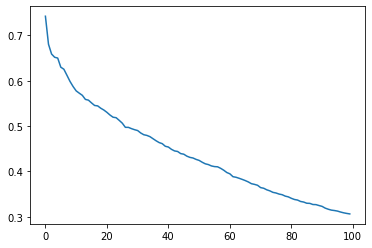

2005
[ 0  3  9  4  2 12  1 21 14  5 48 56 11 22 69 53 62 10 19  6  7 26 31 16
 30 44 87 35 43 39 18 23 45 92 28 34 96 75 15 61 37 41 32 58 49 40 79 72
 52 59 93 88 13  8 66 65 27 24 82 46 54 84 71 64 76 67 17 98 20 63 83 73
 33 86 89 78 77 51 36 91 81 29 57 95 47 97 80 38 25 90 74 85 70 42 94 55
 60 50 68]
[0.08403384 0.00850521 0.01390524 0.02635654 0.01410051 0.00717775
 0.00465018 0.00449137 0.00255747 0.0186402  0.00483913 0.00634789
 0.00881984 0.0025642  0.00803236 0.00342675 0.00427811 0.00204123
 0.00392553 0.00470977 0.0018363  0.00809854 0.00579632 0.00383212
 0.00230384 0.00106817 0.00433968 0.00233022 0.00352403 0.00123849
 0.00427548 0.00428967 0.0031774  0.00157603 0.00350586 0.00414353
 0.00136515 0.00337191 0.00107634 0.0040304  0.00304858 0.00329873
 0.00087439 0.00408945 0.00423747 0.00374153 0.00227561 0.00115628
 0.00656951 0.00309038 0.00046483 0.00139234 0.00260423 0.00511176
 0.00223054 0.00074619 0.00656939 0.00122378 0.00314747 0.00260343
 0.00071874 0.00339503

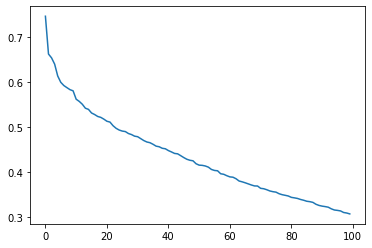

2006
[ 0  3  1 10 12 19  8  5 30  7 56 20 48 37 15 25 40 21 39  4 24 60 29 90
 81 32 50 33 65 28 22 93 44 16 80 83 71  2  6 34 69 27 62 45 36 55 66 52
 58 26 43 85 57 35 46 79 97 95 68 38 75 61 49 82 87 76  9 91 74 18 23 70
 42 41 14 92 54 73 67 86 96 63 53 64 98 13 78 77 47 51 59 94 17 11 89 31
 88 72 84]
[0.06740363 0.01707579 0.00332134 0.01982963 0.00469688 0.0082326
 0.00318929 0.00652203 0.00856061 0.00165158 0.01522657 0.00063649
 0.01022547 0.00104101 0.0014179  0.00541578 0.00343585 0.00067243
 0.00154814 0.0087075  0.00590642 0.00516904 0.00373282 0.00149388
 0.00434773 0.00534043 0.00235791 0.00265139 0.00383098 0.00417915
 0.00674063 0.00061408 0.00404776 0.00392059 0.00289887 0.00222156
 0.0025926  0.00543046 0.00189556 0.00488846 0.00528076 0.00144504
 0.00145227 0.00229257 0.00357585 0.002618   0.00217533 0.00095773
 0.00553428 0.00176433 0.0039317  0.00095136 0.00236658 0.00122022
 0.0013929  0.00245235 0.00651534 0.00225754 0.002362   0.0008784
 0.0041807  0.00187927 0

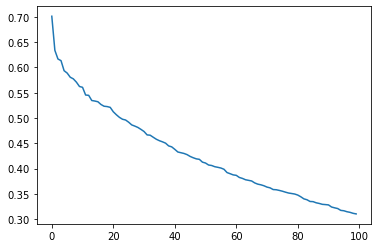

2007
[ 0  1  3  4  2  5  6 10 14  8 26 13 67  7 23 28 22 16 42 17 37 12 36  9
 73 30 48 81 44 57 19 38 43 69 25 50 72 21 91 53 87 54 83 79 96 59 98 76
 82 93 45 15 52 49 11 31 75 39 61 33 63 97 85 29 66 55 58 18 46 70 20 68
 78 74 47 89 62 34 24 40 90 60 32 27 92 77 84 86 65 41 88 56 80 94 64 95
 35 71 51]
[0.08448847 0.02613453 0.01007089 0.01617595 0.01594477 0.00992017
 0.0079483  0.00505294 0.00602373 0.00417202 0.00742334 0.00241952
 0.00436237 0.0055859  0.00624386 0.00251079 0.00481123 0.00448785
 0.00187165 0.00368243 0.00168542 0.00318093 0.00482488 0.00497688
 0.00153515 0.00322954 0.00559092 0.00125419 0.00484348 0.00203151
 0.00393031 0.0023947  0.00127143 0.00228571 0.0015765  0.00058777
 0.00427886 0.0044564  0.00355791 0.00237894 0.00150642 0.00100257
 0.00459808 0.00334294 0.00384241 0.00254837 0.00179426 0.00163687
 0.00391394 0.00246093 0.00322296 0.00047434 0.00246957 0.00295567
 0.00289185 0.00197554 0.00095633 0.00380594 0.00189873 0.00283634
 0.00149941 0.00235778

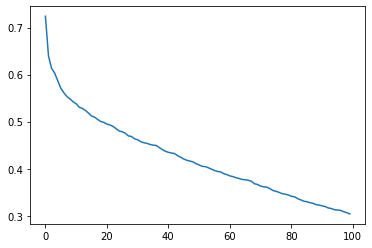

2008
[ 0  3  1  5  4  9  6  2 17 10 12 46 62 36 21 28 14 39 16  8 33 67 50 87
 18 25 83 74 24 72 23 66 29 40 55 15 93 27 69 57 19 98 58 20 37 44 52 79
 35 94 31 32 53 41 61 26 47 60 90 56 88 70 22 13 81 49 59 30  7 77 48 64
 75 82 78 73 89 45 95 68 85 43 84 51 11 63 54 92 71 91 42 97 96 80 34 65
 38 76 86]
[0.06796578 0.02841351 0.0106216  0.03502879 0.01320796 0.01418897
 0.01088282 0.00170376 0.00448228 0.01110059 0.00664193 0.00123087
 0.00653819 0.00187272 0.00477447 0.00322201 0.00456596 0.00731829
 0.00405182 0.00294043 0.00256771 0.00526455 0.00188866 0.00333147
 0.00336289 0.00390675 0.00210903 0.00312756 0.00499968 0.00329383
 0.00172135 0.00236658 0.00235146 0.00448044 0.00068784 0.00247213
 0.00531027 0.00255914 0.00050529 0.00462792 0.00325078 0.00224233
 0.00091435 0.00136994 0.0025533  0.00147535 0.00621565 0.00210119
 0.00167634 0.00176257 0.00422446 0.00127512 0.00254948 0.00224546
 0.00108674 0.00324332 0.00192601 0.00301357 0.00263935 0.00173705
 0.00200406 0.00217401

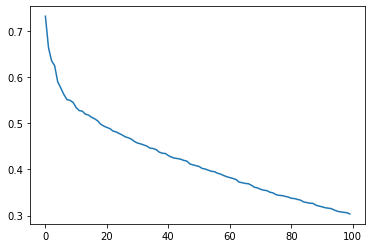

2009
[ 0  2  8 14  9 18  1 10  7  6 12  3 21 33  4 81 41 44 13 35 39 55 23 24
 20 65 69 31 62 30 83 43 34 75 22 60 95 48 56 28 52 42 68 51 17 37 71 57
 26 32 91 72 50 66 90 74 93 45 54 36 86 96 64 15 61 27 46 19  5 87 82 97
 85 59 77 89 73 76 38 78 98 79 47 58 88 80 29 63 92 16 94 84 70 25 40 67
 11 53 49]
[8.13607374e-02 7.20236705e-03 3.96357875e-02 5.86290407e-03
 5.35124070e-03 1.65015141e-03 6.51024841e-03 6.95817944e-03
 1.24431143e-02 9.06681483e-03 7.16920555e-03 4.41337743e-04
 6.43610872e-03 5.05709386e-03 1.12324339e-02 1.84398134e-03
 6.71404687e-04 2.93547581e-03 7.84745106e-03 1.72463329e-03
 4.45352697e-03 5.53327733e-03 3.29794604e-03 4.91046230e-03
 4.74906039e-03 4.92233828e-04 2.82458535e-03 1.81559513e-03
 3.03406241e-03 8.54324779e-04 3.71024656e-03 3.94788186e-03
 2.81448258e-03 5.37476912e-03 3.38170320e-03 5.01716855e-03
 2.34001262e-03 2.86060014e-03 1.13338601e-03 4.94211209e-03
 4.89238394e-04 5.21516896e-03 3.00475867e-03 3.46434677e-03
 5.18890405e-03 2.422

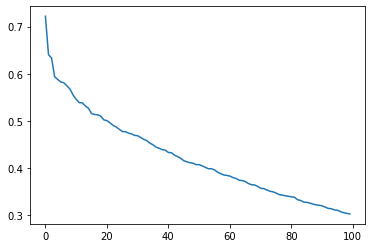

2010
[ 0  3  2  1  6  4 10  7 16 14 54 43 30 17 34 23  9 11 57 20 42 33 25 26
 24 19 21 44 13 35 52 18 56 67  8 37 40 64 29 27 48 15 91 68 12  5 92 71
 70 58 45 98 86 51 72 78 87 60 36 76 61 47 85 80 83 90 59 77 31 95 74 79
 50 22 73 38 88 49 53 39 46 94 28 75 32 41 63 81 93 69 65 97 82 66 62 96
 89 55 84]
[0.07591657 0.01416273 0.0169201  0.02508362 0.00924288 0.00296336
 0.01280967 0.00834975 0.00358949 0.0048429  0.00855745 0.00474178
 0.00296411 0.00382554 0.00677596 0.00313145 0.00709067 0.00520747
 0.00367928 0.00397907 0.00442616 0.00397313 0.00175446 0.00502995
 0.00398416 0.00402576 0.00400405 0.00325061 0.00125824 0.00329766
 0.00548257 0.00182131 0.00115628 0.00425181 0.00519313 0.0037619
 0.00237203 0.0034591  0.00168951 0.00156019 0.00345383 0.00110553
 0.00426724 0.00576695 0.00396245 0.00257268 0.00148476 0.00220787
 0.00322008 0.00162615 0.00178997 0.00249924 0.0037124  0.00156151
 0.0061368  0.00034126 0.00365191 0.0044948  0.00261641 0.00186881
 0.00238235 0.0022511  

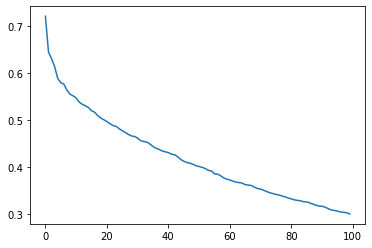

2011
[ 0  1  4  2  3  7 10 12 15 24 11 19 14 31  9 44 83  6  5 76 45 95 49 66
 30 62 55 38 17 32 50 42 78 40 71 22 37 21 87 90 53 57 67 41 59 27 91 16
 34 28 81 29 64 98 96 18 68 58 33 48 26 51 60 79 20 23 85 70 54 65 56 84
 69 73 74 25 86  8 52 63 43 13 80 39 77 94 36 97 35 89 46 82 61 88 93 47
 72 75 92]
[0.07042547 0.03530535 0.01902198 0.01354816 0.03059655 0.00509577
 0.00521689 0.01249789 0.00104094 0.00604118 0.01105317 0.00678711
 0.00875947 0.0009276  0.00649861 0.00699646 0.00242478 0.00391761
 0.00213262 0.00651977 0.00183616 0.00339318 0.00340927 0.0017573
 0.00694465 0.00126666 0.00193152 0.00259057 0.0022918  0.00227526
 0.00423495 0.00646058 0.00386151 0.00205008 0.00237554 0.00066415
 0.00076728 0.00339695 0.00396535 0.00089158 0.00356581 0.00264304
 0.00371105 0.00100267 0.00533096 0.00481528 0.00059414 0.00040516
 0.00201544 0.00437972 0.00374439 0.00192162 0.00102961 0.0031369
 0.00169013 0.00396796 0.0016858  0.00297635 0.00210337 0.00263484
 0.00185065 0.00047209 0

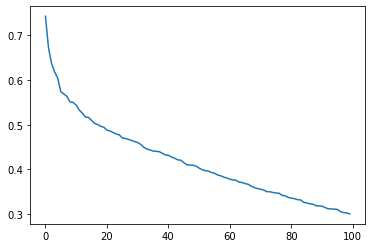

2012
[ 0  3  1  4  8 14 13 16  7 20 30  5 52 46 38 41 21  2 17 12 31 10 64 49
 94 85 22 19 61  6 55 24 70 98 79 28 35 59 45 27 76  9 50 58 33 90 67 15
 75 80 60 57 39 40 82 89 73 92 26 43 77 69 56 51 44 72 83 84 42 95 32 68
 11 66 53 91 34 48 71 54 78 86 74 88 29 25 65 63 36 87 96 62 18 37 81 23
 97 47 93]
[0.06869655 0.02695813 0.00496809 0.02809541 0.01516182 0.00659934
 0.0036951  0.00708917 0.00857598 0.00278754 0.00460587 0.00176264
 0.00477346 0.0084595  0.00853415 0.00253466 0.00829844 0.00479462
 0.00083728 0.00394149 0.00706926 0.00537096 0.00402994 0.00069618
 0.00349915 0.00126835 0.00211494 0.00299471 0.0032742  0.00128676
 0.0068799  0.0046785  0.00178906 0.00272467 0.00159505 0.00320038
 0.00109703 0.00078067 0.00546903 0.00237539 0.00230368 0.00546476
 0.0019394  0.00211134 0.00201853 0.00305691 0.00557141 0.00053704
 0.00146251 0.00430376 0.00275709 0.00204286 0.00648227 0.00165191
 0.00141469 0.00350137 0.00205738 0.00240031 0.00273828 0.00318631
 0.00250671 0.00382673

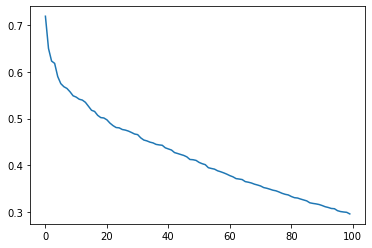

2013
[ 0  2  4  3  6  9  7 22  8 25  5 10 24 36 65 47 15 19 13 63 11 17 37 76
 28 39 58  1 31 66 54 38 35 12 87 70 59 43 56 21 30 51 52 97 27 84 90 42
 79 50 14 26 45 55 95 53 16 46 96 81 18 89 33 60 41 44 73 69 62 23 34 83
 67 20 93 75 82 68 48 77 74 32 72 98 88 40 29 80 92 61 78 71 49 94 86 85
 91 64 57]
[0.08771671 0.00400769 0.01839403 0.01674675 0.01747788 0.00540092
 0.01213661 0.00961237 0.00611375 0.01061908 0.00539731 0.004888
 0.00355222 0.00505404 0.00259412 0.0052352  0.00235925 0.00467381
 0.00230021 0.00507548 0.00181573 0.00314596 0.00704243 0.00204561
 0.00537869 0.0055094  0.00252003 0.00283584 0.00427255 0.0010279
 0.00312546 0.00395745 0.00123992 0.00227884 0.00204161 0.00356591
 0.00534051 0.00462641 0.0036233  0.00419978 0.0011041  0.00222828
 0.00272056 0.00320677 0.00221755 0.00251476 0.00235441 0.00526202
 0.0014589  0.00058471 0.00269104 0.00301284 0.00291521 0.00237844
 0.00383738 0.00251116 0.00320065 0.00017859 0.00409441 0.00324354
 0.00225586 0.0008956  0.

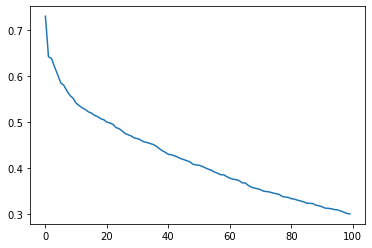

2014
[ 0  1  3  4 13  7  2  5  9 17 10 27 50 11  8  6 61 79 40 12 22 62 49 52
 30 16 37 23 28 29 96 44 87 71 45 24 20 72 75 35 90 55 33 39 18 54 67 31
 34 69 36 47 77 70 21 85 84 25 93 58 42 82 46 65 59 63 83 91 19 81 98 14
 43 73 57 78 66 41 56 60 53 88 86 26 38 15 76 94 89 64 51 48 97 68 32 95
 92 80 74]
[0.07606541 0.03425835 0.00931652 0.03008929 0.01407332 0.00915201
 0.00535536 0.00949865 0.0054161  0.00824211 0.0068851  0.00561119
 0.00471758 0.01005618 0.00183354 0.00109652 0.0039541  0.00708218
 0.00274901 0.0019221  0.00335381 0.00232062 0.0044443  0.00381288
 0.00337056 0.00219269 0.00114679 0.00597373 0.00378772 0.00378331
 0.00399671 0.00272017 0.00080355 0.00297859 0.00271105 0.0032181
 0.00243296 0.00384408 0.00111253 0.00286603 0.0047539  0.00140676
 0.00208115 0.00179075 0.00362918 0.00339631 0.00205874 0.00242809
 0.00089578 0.00433866 0.00566222 0.00090412 0.00423362 0.00120636
 0.00274776 0.00298029 0.00134016 0.00170475 0.00215487 0.00204948
 0.00128408 0.00491    

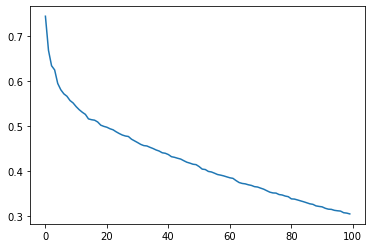

In [12]:
for season in range(1985, 2015):
    adj = sp.load_npz('./finer'+str(season)+'adj.npz')
    A = adj.tocsc()
    D_out = sp.diags(A.transpose().sum(
        axis=0).tolist(), [0]).tocsc()
    D_in = sp.diags(A.sum(axis=0).tolist(), [0]).tocsc()
    Dbar = (D_in + D_out)
    d = sqrtinvdiag(Dbar)
    normA = d * A * d
    size = A.shape[0]
    H = (A-A.transpose()) * 1j
    H_abs = np.abs(H)
    D_abs_inv = sp.diags(1/np.array(H_abs.sum(1))[:, 0])
    D_abs_inv.data[np.isinf(D_abs_inv.data)] = 0.0
    H_rw = D_abs_inv.dot(H)
    _, s, _ = sp.linalg.svds(H_rw, 100)
    eigens = s[list(np.arange(99,-1,-1))]
    eigengaps = eigens[:-1] - eigens[1:]
    print(season)
    print(np.argsort(-eigengaps))
    print(eigengaps)
    plt.plot(eigens)
    plt.show()

In [13]:
# not good clustering structure. just use K=20 and F=2 then.

In [14]:
import sklearn.cluster as sl
num_clusters = 20
u, s, vt = sp.linalg.svds(H_rw, num_clusters)
features_SVD = np.concatenate((np.real(u), np.imag(u)), axis=1)
x = sl.KMeans(n_clusters=num_clusters).fit_predict(features_SVD)

In [15]:
labels = x

In [16]:
import torch
import matplotlib.pyplot as plt

In [19]:
A = torch.FloatTensor(A.toarray())
P = torch.zeros(labels.shape[0], num_clusters).to(A.device)
for k in range(num_clusters):
    P[labels == k, k] = 1
flow_mat = np.ones([num_clusters, num_clusters])*0.5
for k in range(num_clusters-1):
    for l in range(k+1, num_clusters):
        w_kl = torch.matmul(P[:, k], torch.matmul(A, P[:, l])).item()
        w_lk = torch.matmul(P[:, l], torch.matmul(A, P[:, k])).item()
        if (w_kl + w_lk) > 0:
            flow_mat[k, l] = w_kl/(w_kl + w_lk)
            flow_mat[l, k] = w_lk/(w_kl + w_lk)

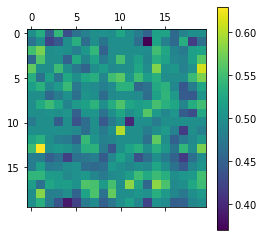

In [20]:
plt.matshow(flow_mat)
plt.colorbar()

In [23]:
np.sum(flow_mat>0.6)

2